### ライブラリを読む

In [430]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#### jp1データを読む

In [368]:
comp = pd.read_csv('comp.csv', header=None)

In [369]:
comp.rename(columns={0:'pc_name',1:'shubetsu'}, inplace=True)

In [409]:
comp.shape

(318, 4)

####  318レコードのうち、カッコは何個ある？

In [410]:
comp.pc_name.str.contains('（')
comp.pc_name.str.contains('（').value_counts()

True    318
Name: pc_name, dtype: int64

#### 全角カッコ「（」を区切りとしてPCとメーカーを分離。その後全角カッコ「）」を除去

In [411]:
comp['pc_name2'] = comp.pc_name.apply(lambda x: x.split('（')[0])
comp['maker'] = comp.pc_name.apply(lambda x: x.split('（')[1])
comp['maker']  = comp.maker.str.replace('）', '')

In [412]:
comp.head(3)

,pc_name,shubetsu,pc_name2,maker
0,10AXA25U00（LENOVO）,N,10AXA25U00,LENOVO
1,10GAA02NJP（LENOVO）,N,10GAA02NJP,LENOVO
2,20A7A01CJP（LENOVO）,N,20A7A01CJP,LENOVO


#### 新しいcsvファイルを作成

In [413]:
comp.to_csv('comp2.csv', index=None)

In [426]:
comp2 = pd.read_csv('comp2.csv')

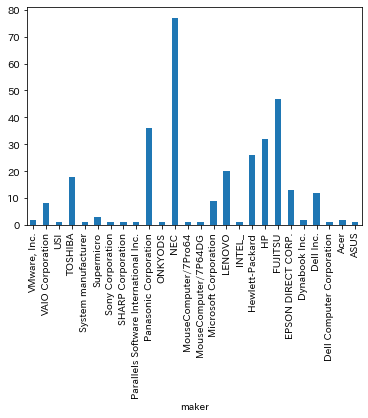

In [428]:
comp3.sort_values('maker', ascending=False).pc_name.plot.bar()
plt.show()

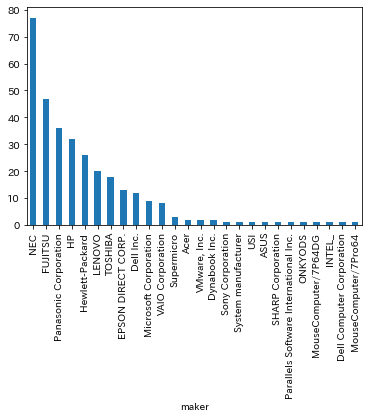

In [416]:
comp3.sort_values('pc_name2', ascending=False).pc_name.plot.bar()
plt.show()

###　ノートとデスクトップの割合

N    192
D    126
Name: shubetsu, dtype: int64


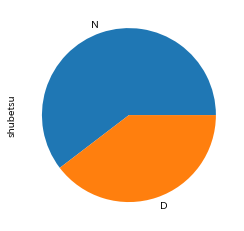

In [431]:
print(comp2.shubetsu.value_counts())
comp2.shubetsu.value_counts().plot.pie()
